# Loading, cleaning, and merging datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rentals1 = pd.read_csv('Indego_Trips_2015Q4.csv')
rentals2 = pd.read_csv('Indego_Trips_2016Q1.csv')
rentals3 = pd.read_csv('Indego_Trips_2016Q2.csv')

rentals = rentals1.append(rentals2).append(rentals3)

In [3]:
rentals.head(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type
0,4376433,1140,10/1/15 0:04,10/1/15 0:23,3041.0,39.96849,-75.13546,3026,39.94138,-75.14564,3302,0,One Way,Walk-up
1,4376434,720,10/1/15 0:08,10/1/15 0:20,3045.0,39.94792,-75.16237,3026,39.94138,-75.14564,2605,30,One Way,Indego30
2,4376435,600,10/1/15 0:27,10/1/15 0:37,3060.0,39.95923,-75.17036,3075,39.96718,-75.16125,2532,30,One Way,Indego30
3,4376437,840,10/1/15 0:36,10/1/15 0:50,3052.0,39.94732,-75.15695,3068,39.93549,-75.16711,3715,30,One Way,Indego30
4,4376438,360,10/1/15 0:37,10/1/15 0:43,3017.0,39.98003,-75.14371,3036,39.96844,-75.14001,3279,30,One Way,Indego30


In [4]:
rentals.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station_id',
       'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type'],
      dtype='object')

In [5]:
stime = '(?P<hour>\d+):(?P<minute>\d+)'
stimes = rentals['start_time'].str.extract(stime, expand=True)
stimes.head(5)
etime = '(?P<hour>\d+):(?P<minute>\d+)'
etimes = rentals['end_time'].str.extract(etime, expand=True)
etimes.head(5)
rentals['start_hour']=stimes['hour'].astype(float)
rentals['end_hour']=etimes['hour'].astype(float)
rentals['count']=1

date = '(?P<month>\d+)/(?P<day>\d+)/(?P<year>\d+)'
dates = rentals['start_time'].str.extract(date, expand=True)
print(dates.dtypes)
rentals['date']=dates['year'].astype(str)+'-'+dates['month'].astype(str)+'-'+dates['day'].astype(str)

month    object
day      object
year     object
dtype: object


In [6]:
rentals.head(5)

,trip_id,duration,start_time,end_time,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_hour,end_hour,count,date
0,4376433,1140,10/1/15 0:04,10/1/15 0:23,3041.0,39.96849,-75.13546,3026,39.94138,-75.14564,3302,0,One Way,Walk-up,0.0,0.0,1,15-10-1
1,4376434,720,10/1/15 0:08,10/1/15 0:20,3045.0,39.94792,-75.16237,3026,39.94138,-75.14564,2605,30,One Way,Indego30,0.0,0.0,1,15-10-1
2,4376435,600,10/1/15 0:27,10/1/15 0:37,3060.0,39.95923,-75.17036,3075,39.96718,-75.16125,2532,30,One Way,Indego30,0.0,0.0,1,15-10-1
3,4376437,840,10/1/15 0:36,10/1/15 0:50,3052.0,39.94732,-75.15695,3068,39.93549,-75.16711,3715,30,One Way,Indego30,0.0,0.0,1,15-10-1
4,4376438,360,10/1/15 0:37,10/1/15 0:43,3017.0,39.98003,-75.14371,3036,39.96844,-75.14001,3279,30,One Way,Indego30,0.0,0.0,1,15-10-1


In [7]:
rentals_total = rentals.groupby(['date','start_hour'],as_index = False).sum()
#print(rentals_total.index.get_level_values(0))
#print(rentals_total.index.get_level_values(1))
#print(rentals_total.index.get_level_values('count'))
rentals_total.head(5)

,date,start_hour,trip_id,duration,start_station_id,start_lat,start_lon,end_station_id,end_lat,end_lon,bike_id,plan_duration,end_hour,count
0,15-10-1,0.0,26258616,4560,18262.0,239.75370,-450.91806,18272,239.72236,-450.89511,18144,150,1.0,6
1,15-10-1,1.0,39387996,30480,27357.0,359.63353,-676.46080,27341,359.58954,-676.48553,29822,150,18.0,9
2,15-10-1,2.0,17505802,4560,12151.0,159.81118,-300.73119,12280,159.78549,-300.65251,12076,120,10.0,4
3,15-10-1,3.0,13129362,1500,9065.0,119.89099,-225.52509,9059,119.88697,-225.54156,9907,60,9.0,3
4,15-10-1,4.0,26258757,2640,18185.0,239.72419,-450.97585,18119,239.70061,-450.98221,20215,180,25.0,6


In order to predict station popularity by hour, we want to make a new df with stations, hours, and counts of rentals at those hours.

In [8]:
weather=pd.read_csv('Weather_Oct_Jun.csv')
print(weather.columns)
weather.head(5)

Index(['EDT', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')


,EDT,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2015-10-1,65,61,57,57,52,47,86,73,60,...,10,8,2,24,16,30.0,0.49,8,Rain,39
1,2015-10-2,57,54,50,51,47,45,86,82,77,...,10,6,1,32,23,45.0,1.55,8,Rain,41
2,2015-10-3,57,53,49,51,49,46,89,83,77,...,10,9,3,26,19,35.0,0.01,8,Rain,49
3,2015-10-4,63,59,55,49,47,44,77,65,52,...,10,10,10,24,15,35.0,0.00,7,NaN,53
4,2015-10-5,69,60,51,47,44,42,72,57,42,...,10,10,10,18,10,25.0,0.00,4,NaN,42


## With the two data frames, merge them based on date

In [9]:
# Make a new data frame containing the bike rental date, hour, and station id
rentals_day = rentals_total[['date','start_hour','count']]
# rename appropriately. need one common column name to merge
rentals_day.columns = ['date','hour','count']

# do the same for the weather
weather_day = weather[['EDT','Mean TemperatureF',' Mean Humidity',' Mean Wind SpeedMPH']]
weather_day.columns = ['date','mean temp','mean hum','mean wind']

# merge based on date
weather_rental = pd.merge(weather_day, rentals_day, on='date')
weather_rental.head(5)

,date,mean temp,mean hum,mean wind,hour,count
0,2016-1-1,39,50,12,0.0,26
1,2016-1-1,39,50,12,1.0,40
2,2016-1-1,39,50,12,2.0,33
3,2016-1-1,39,50,12,3.0,6
4,2016-1-1,39,50,12,4.0,1


### Now we have a clean dataframe with the date, weather info, hour, and bike rental counts

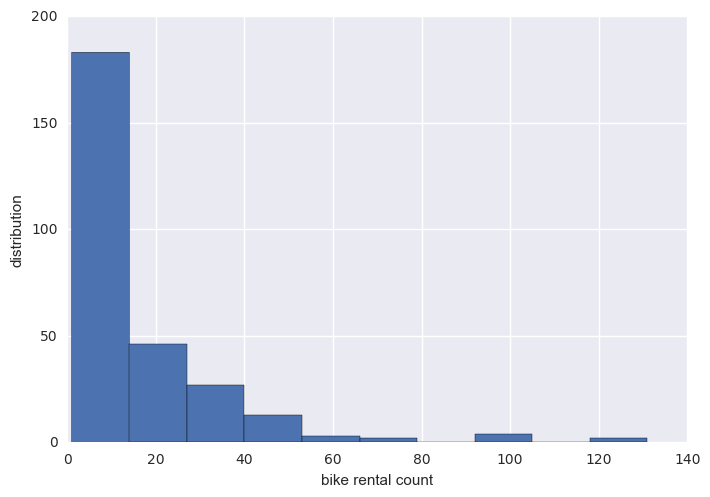

In [74]:
import seaborn as sns
sns.plt.hist(weather_rental['count'].value_counts())
plt.xlabel('bike rental count')
plt.ylabel('distribution')


# Time to train and predict

In [10]:
train = weather_rental.sample(frac=.8)
test = weather_rental.loc[~weather_rental.index.isin(train.index)]
test.head(3)

,date,mean temp,mean hum,mean wind,hour,count
4,2016-1-1,39,50,12,4.0,1
14,2016-1-1,39,50,12,14.0,71
15,2016-1-1,39,50,12,15.0,57


In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, \
                            min_samples_split=10, min_samples_leaf=5, max_features='auto')
reg.fit(train[predictors], train["count"])

pred = reg.predict(test[predictors])
print(np.mean(pred))
mse = mean_squared_error(test['count'],pred)
print(mse)

print (pred[:5])
print (test['count'].iloc[:5])
test.head(5)

57.8459349111
734.735168915
[  2.32327742  48.03133811  45.92161588  40.82825369  17.24869048]
4      1
14    71
15    57
19    14
22     7
Name: count, dtype: int64


,date,mean temp,mean hum,mean wind,hour,count
4,2016-1-1,39,50,12,4.0,1
14,2016-1-1,39,50,12,14.0,71
15,2016-1-1,39,50,12,15.0,57
19,2016-1-1,39,50,12,19.0,14
22,2016-1-1,39,50,12,22.0,7


# Pull weather data for today and predict for this hour

In [64]:
from urllib.request import Request, urlopen
import json
req = Request('http://api.wunderground.com/api/1e806efcbfa974b3/geolookup/conditions/q/PA/Philadelphia.json')
data = urlopen(req).read().decode('utf-8')
feed = json.loads(data)

print (feed['location']['city'])
print (feed['current_observation']['temp_f'])
print (feed['current_observation']['wind_mph'])
print (feed['current_observation']['relative_humidity'])

import re
re=re.findall(r'\d+', feed['current_observation']['relative_humidity'])
temp=feed['current_observation']['temp_f']
wind=feed['current_observation']['wind_mph']
hum=float(re[0])
hour=17.0

data=[[temp,hum,wind,hour]]
today = pd.DataFrame(data,columns=predictors)

print(today)
reg.predict(today[predictors])
              


Philadelphia
60.4
6.3
51%
   mean temp  mean hum  mean wind  hour
0       60.4      51.0        6.3  17.0


array([ 224.647331])